 # Werkzeuge der Mustererkennung und des maschinellen Lernens

Dieses Notebook enthält Beispielcode, mit dem ihr Datensatz laden könnt. Den Downloadlink für den Datensatz findet ihr im Moodle. Zum Laden nutzen wir das `aeon`-Paket, welches ihr mit `pip install aeon` installieren könnt (für mehr Informationen: https://github.com/aeon-toolkit/aeon). Anschließend erhaltet ihr wie ihr es bereits gewohnt seid ein `numpy`-Array mit den Messdaten sowie den zugehörigen Klassen. Die Interpretation der Label ist im Datensatzordner näher beschrieben.

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd '/content/drive/MyDrive/ML/MindReading/MindReading'

/content/drive/MyDrive/ML/MindReading/MindReading


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
!pip install aeon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0


In [9]:
from os.path import join
import aeon
# Install aeon via "pip install aeon" (see https://github.com/aeon-toolkit/aeon).
from aeon.datasets import load_from_ts_file

 # 1. Load and visualize the data.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# Path to "MindReading" folder
path_to_dataset = '/content/drive/MyDrive/ML/MindReading/MindReading'

X, y, meta_data =  load_from_ts_file(join(path_to_dataset, "MindReading.ts"), return_meta_data=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
print(meta_data)
print(X.shape)
print(y.shape)

n, d, timesteps = X.shape

{'problemname': 'mindreading.ts', 'timestamps': False, 'missing': False, 'univariate': False, 'equallength': True, 'classlabel': True, 'targetlabel': False, 'class_values': ['1', '2', '3', '4', '5']}
(1380, 204, 200)
(1380,)


In [14]:

sns.set_style("whitegrid")


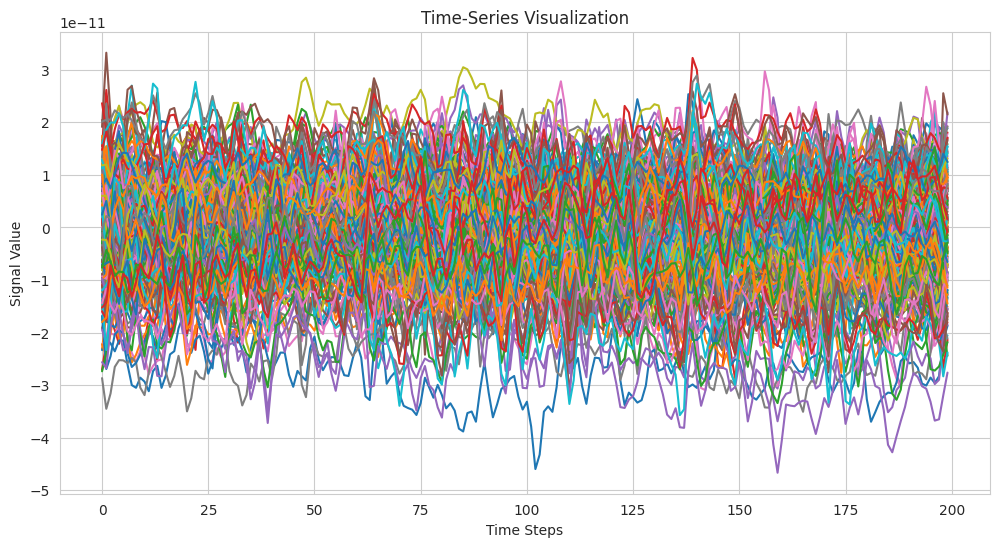

In [15]:
def plot_time_series(X, y, sample_ids=[0], title="Time-Series Visualization"):
    plt.figure(figsize=(12, 6))

    for i, sample_id in enumerate(sample_ids):
        plt.plot(X[sample_id].T, label=f"Sample {sample_id} - Class {y[sample_id]}")

    plt.xlabel("Time Steps")
    plt.ylabel("Signal Value")
    plt.title(title)

    plt.show()


plot_time_series(X, y, sample_ids=[0])


Unique values in y: ['1' '2' '3' '4' '5']


<ipython-input-16-040c67516f71>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_classes, y=counts, palette="viridis")


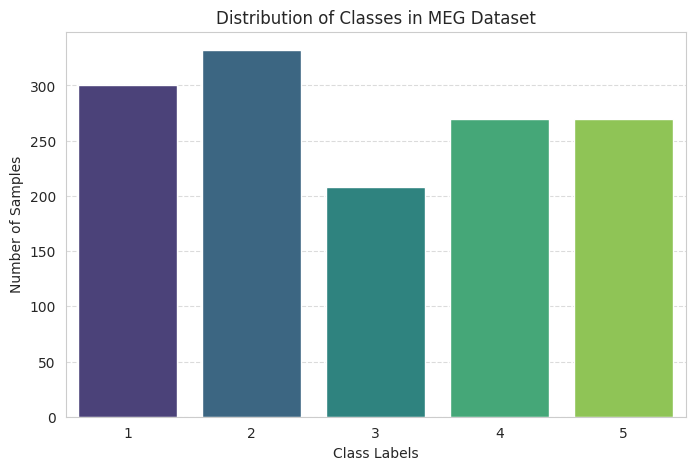

In [16]:
print("Unique values in y:", np.unique(y))


unique_classes, counts = np.unique(y, return_counts=True)


plt.figure(figsize=(8, 5))
sns.barplot(x=unique_classes, y=counts, palette="viridis")


plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in MEG Dataset")
plt.xticks(unique_classes)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

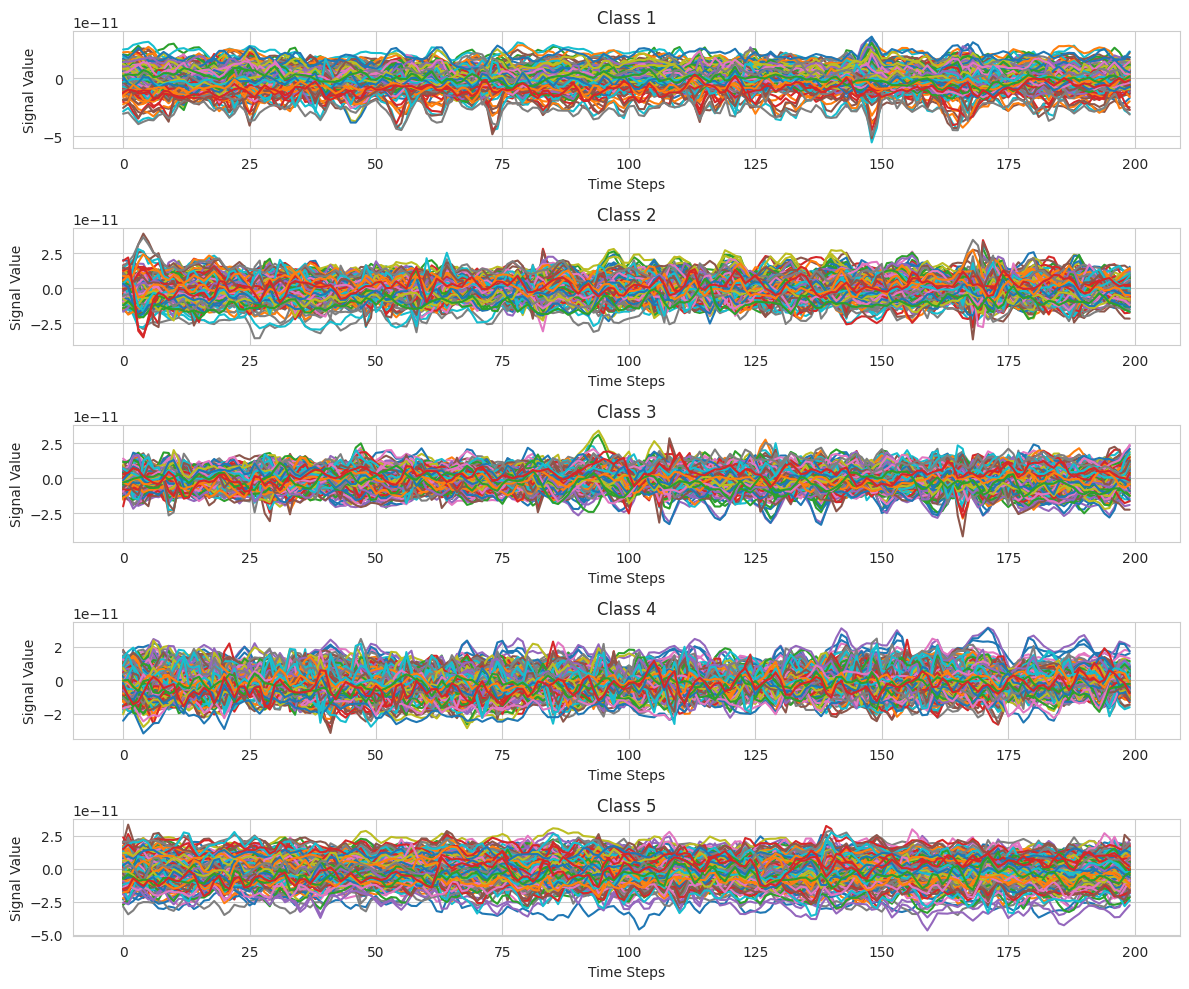

In [17]:
def plot_time_series_per_class(X, y, title="Time-Series Visualization"):
    unique_classes = np.unique(y)
    plt.figure(figsize=(12, 10))

    for i, class_label in enumerate(unique_classes):

        sample_idx = np.where(y == class_label)[0][0]

        plt.subplot(5, 1, i + 1)
        plt.plot(X[sample_idx].T)
        plt.title(f"Class {class_label}")
        plt.xlabel("Time Steps")
        plt.ylabel("Signal Value")

    plt.tight_layout()
    plt.show()

plot_time_series_per_class(X, y)


<ipython-input-18-a04c07ca0213>:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", fontsize="small")


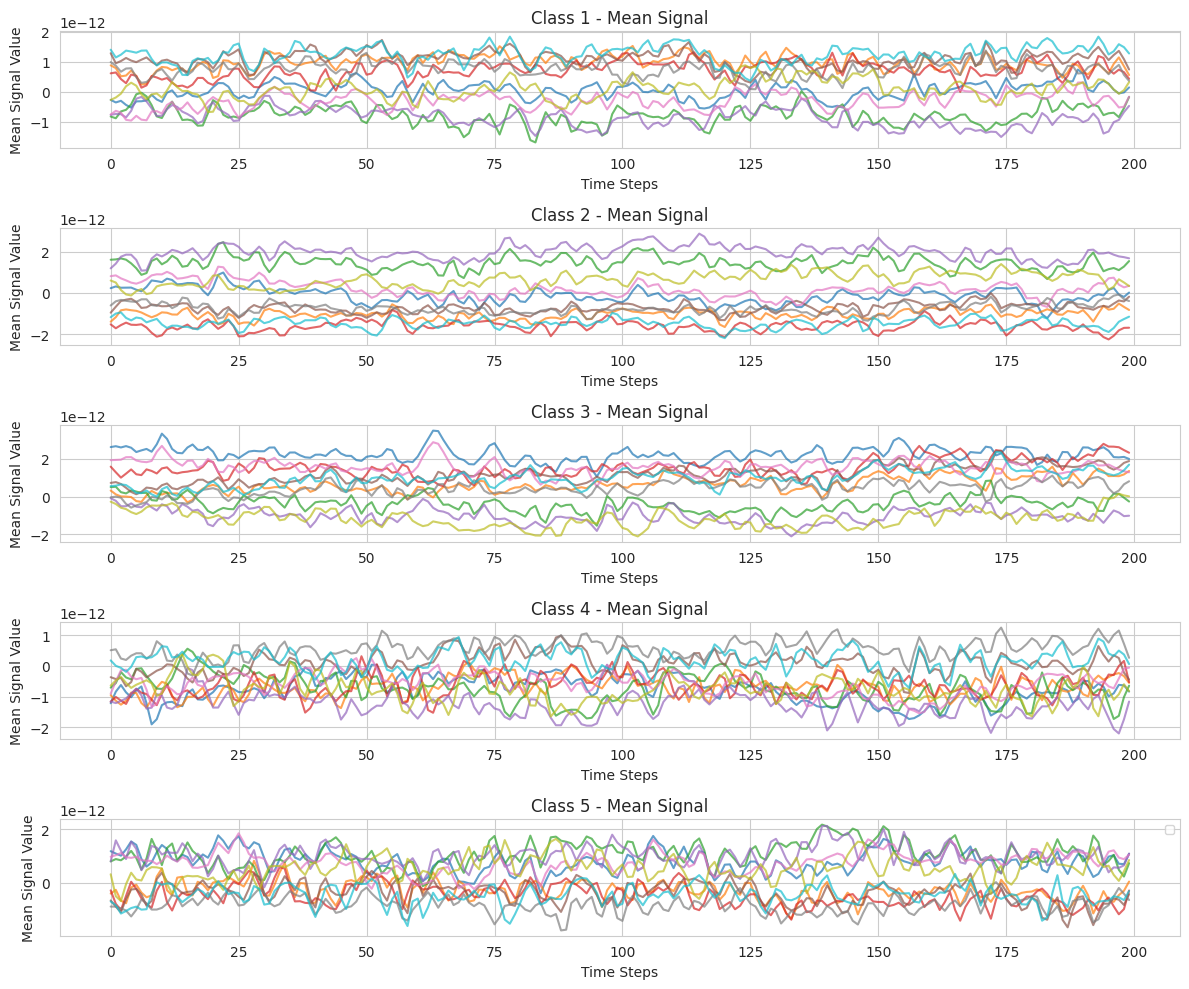

In [18]:
def plot_mean_signal_per_class(X, y, num_channels=10, title="Mean Brain Signal Per Class"):
    unique_classes = np.unique(y)
    plt.figure(figsize=(12, 10))

    for i, class_label in enumerate(unique_classes):
        class_samples = X[y == class_label]


        mean_signal = np.mean(class_samples, axis=0)

        plt.subplot(5, 1, i + 1)
        for ch in range(min(num_channels, X.shape[1])):
            plt.plot(mean_signal[ch, :], alpha=0.7, label=f"Channel {ch+1}" if i == 0 else "")

        plt.title(f"Class {class_label} - Mean Signal")
        plt.xlabel("Time Steps")
        plt.ylabel("Mean Signal Value")

    plt.tight_layout()  # Adjust layout
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

plot_mean_signal_per_class(X, y, num_channels=10)


 # 2. Split the data using a stratified split for evaluation.


In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Defining the split ratio (80% train, 20% test)
test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

# Splitting the dataset into training and test sets
# The 'stratify=y' ensures that class distribution remains similar in both sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Checking class distribution to ensure balanced splitting
# 'np.unique' returns the unique classes along with their respective counts
print("\nClass distribution in training set:", np.unique(y_train, return_counts=True))
print("Class distribution in test set:", np.unique(y_test, return_counts=True))

Training set shape: (1104, 204, 200) (1104,)
Test set shape: (276, 204, 200) (276,)

Class distribution in training set: (array(['1', '2', '3', '4', '5'], dtype='<U1'), array([240, 266, 166, 216, 216]))
Class distribution in test set: (array(['1', '2', '3', '4', '5'], dtype='<U1'), array([60, 66, 42, 54, 54]))


# 3. Train a 𝑘-nearest-neighbor classifier and an SVM with kernel trick on features extracted with PCA.
In each case, select a hyperparameter that you choose via a grid search. Then compare the performance of the two classifiers.

Additional notes:

o No cross-validation necessary

o No visualization necessary

o Also make sure to choose a suitable metric (e.g. accuracy, ...)

In [21]:
# Define train-test split ratio and set a fixed random state for reproducibility
test_size = 0.2
random_state = 42

# Reshape X to ensure it's in the correct format before splitting
X_train, X_test, y_train, y_test = train_test_split(
    X.reshape(X.shape[0], -1), y, test_size=test_size, stratify=y, random_state=random_state
)

# Reduce dimensionality to 50 principal components for better efficiency
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Perform hyperparameter tuning for k-NN
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn = GridSearchCV(KNeighborsClassifier(), knn_params)
knn.fit(X_train_pca, y_train)
best_knn = knn.best_estimator_  # Retrieve best model from grid search
knn_pred = best_knn.predict(X_test_pca)

# Perform hyperparameter tuning for SVM with different C values and kernels
svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'poly', 'sigmoid']}
svm = GridSearchCV(SVC(), svm_params)
svm.fit(X_train_pca, y_train)
best_svm = svm.best_estimator_
svm_pred = best_svm.predict(X_test_pca)

# Evaluate model performance
knn_acc = accuracy_score(y_test, knn_pred)
svm_acc = accuracy_score(y_test, svm_pred)

print(f"Best k-NN Model: {best_knn}")
print(f"Best SVM Model: {best_svm}")

# Compare accuracy of both models
print("\n--- Performance Comparison ---")
print(f"k-NN Accuracy: {knn_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

# Display classification reports for detailed performance metrics
print("\nClassification Report for k-NN:")
print(classification_report(y_test, knn_pred))

print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))


Best k-NN Model: KNeighborsClassifier(n_neighbors=3)
Best SVM Model: SVC(C=10)

--- Performance Comparison ---
k-NN Accuracy: 0.6196
SVM Accuracy: 0.7065

Classification Report for k-NN:
              precision    recall  f1-score   support

           1       0.51      0.73      0.60        60
           2       0.66      0.59      0.62        66
           3       0.67      0.43      0.52        42
           4       0.58      0.65      0.61        54
           5       0.80      0.65      0.71        54

    accuracy                           0.62       276
   macro avg       0.64      0.61      0.62       276
weighted avg       0.64      0.62      0.62       276


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73        60
           2       0.75      0.79      0.77        66
           3       0.67      0.57      0.62        42
           4       0.58      0.74      0.65        54
           5       0.

# 4. Both the 𝑘-nearest-neighbor classifier and the SVM are not statistical classifiers,
so they do not explicitly model the distribution 𝑝(𝑥|𝜅). Train a statistical classifier (e.g. Naive Bayes, normal distribution classifier, ...) of your choice. Perform cross-validation
to choose a hyperparameter and visualize the results so that the variance estimated using cross-validation is clear.

In [22]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

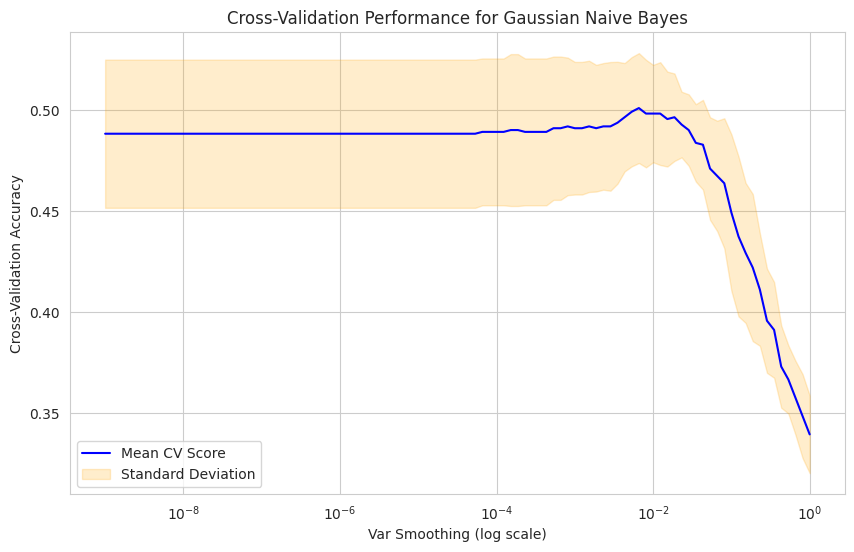

Best `var_smoothing`: 0.006579332246575682
Best cross-validation accuracy: 0.5009


In [23]:
# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Define hyperparameter grid for var_smoothing (controls smoothing level)
param_grid = {'var_smoothing': np.logspace(0, -9, 100)}

# Perform grid search with 5-fold cross-validation to find the best var_smoothing
grid_search = GridSearchCV(estimator=naive_bayes, param_grid=param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

# Extract cross-validation results
mean_cv_score = grid_search.cv_results_['mean_test_score']
std_cv_score = grid_search.cv_results_['std_test_score']
var_smoothing_values = grid_search.cv_results_['param_var_smoothing'].data

# Plot mean CV score with standard deviation as a shaded region
plt.figure(figsize=(10, 6))
plt.plot(var_smoothing_values, mean_cv_score, label="Mean CV Score", color='blue')
plt.fill_between(var_smoothing_values,
                 mean_cv_score - std_cv_score,
                 mean_cv_score + std_cv_score,
                 alpha=0.2, label="Standard Deviation", color='orange')

plt.xscale('log')  # Use log scale for better visualization
plt.xlabel('Var Smoothing (log scale)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Performance for Gaussian Naive Bayes')
plt.legend()
plt.show()

# Retrieve the best hyperparameter and corresponding accuracy
best_var_smoothing = grid_search.best_params_['var_smoothing']
best_score = grid_search.best_score_

print(f"Best `var_smoothing`: {best_var_smoothing}")
print(f"Best cross-validation accuracy: {best_score:.4f}")


# 5. Train a neural network as a classifier using PyTorch.
Train on the original input data (not on the features extracted with PCA). Justify your choice of network architecture, training procedure (e.g. weight decay, early stopping) and hyperparameters. You do not need to perform a formal hyperparameter search for the hyperparameter selection.

Using device: cuda
Epoch 1/50, Loss: 1.7980, Accuracy: 0.4751
Epoch 2/50, Loss: 0.5847, Accuracy: 0.5430
Epoch 3/50, Loss: 0.1615, Accuracy: 0.5837
Epoch 4/50, Loss: 0.0519, Accuracy: 0.5520
Epoch 5/50, Loss: 0.0193, Accuracy: 0.5792
Epoch 6/50, Loss: 0.0063, Accuracy: 0.5747
Epoch 7/50, Loss: 0.0033, Accuracy: 0.5701
Epoch 8/50, Loss: 0.0021, Accuracy: 0.5792
Epoch 9/50, Loss: 0.0017, Accuracy: 0.5792
Epoch 10/50, Loss: 0.0014, Accuracy: 0.5792
Epoch 11/50, Loss: 0.0013, Accuracy: 0.5747
Epoch 12/50, Loss: 0.0011, Accuracy: 0.5792
Epoch 13/50, Loss: 0.0010, Accuracy: 0.5792
Epoch 14/50, Loss: 0.0010, Accuracy: 0.5837
Epoch 15/50, Loss: 0.0009, Accuracy: 0.5837
Epoch 16/50, Loss: 0.0008, Accuracy: 0.5882
Epoch 17/50, Loss: 0.0008, Accuracy: 0.5837
Epoch 18/50, Loss: 0.0007, Accuracy: 0.5837
Epoch 19/50, Loss: 0.0007, Accuracy: 0.5882
Epoch 20/50, Loss: 0.0007, Accuracy: 0.5882
Epoch 21/50, Loss: 0.0007, Accuracy: 0.5882
Epoch 22/50, Loss: 0.0006, Accuracy: 0.5882
Epoch 23/50, Loss: 0.0

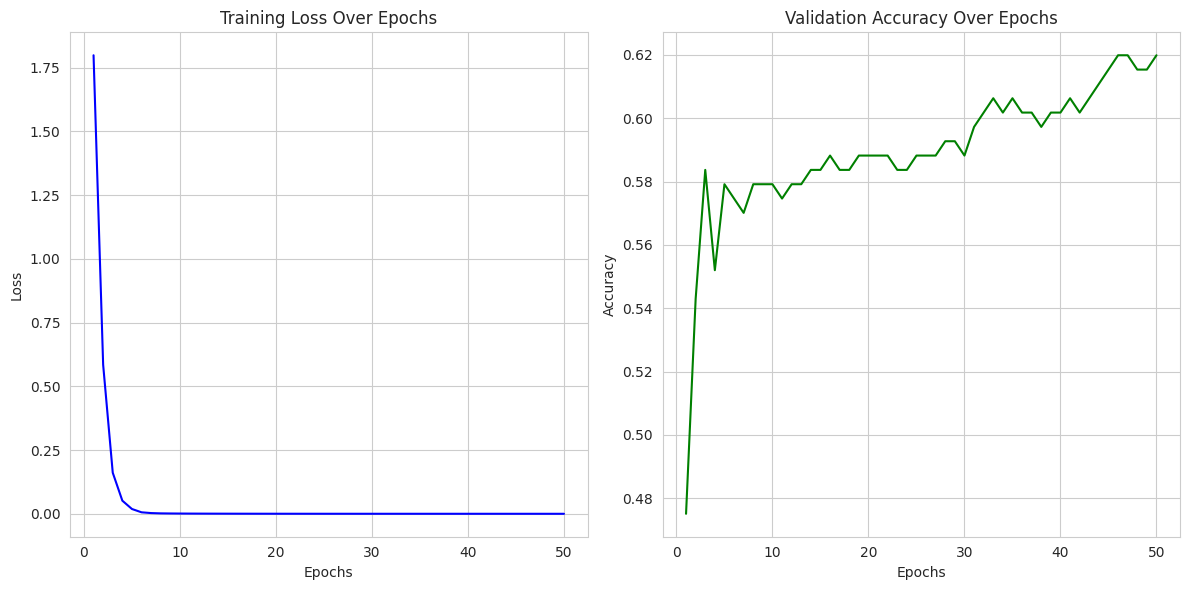

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Set device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Encode labels as integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert to PyTorch tensors and move to the selected device
X_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)

# Split into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_tensor.cpu().numpy(), y_tensor.cpu().numpy(), test_size=0.2, stratify=y_tensor.cpu().numpy()
)

# Convert split data back to PyTorch tensors
X_train_tensor = torch.tensor(X_train_split, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val_split, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_split, dtype=torch.long).to(device)
y_val_tensor = torch.tensor(y_val_split, dtype=torch.long).to(device)

# Create data loaders for batching
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define a simple feedforward neural network
class ClassifierNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(ClassifierNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # Output layer (raw logits)
        return x

# Initialize the model with input size and class count
input_size = X_train.shape[1]
num_classes = len(np.unique(y_train))
model = ClassifierNN(input_size, hidden_size1=256, hidden_size2=128, num_classes=num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Weight decay for regularization

# Training settings
epochs = 50
patience = 5  # Early stopping threshold
best_val_loss = np.inf
early_stop_counter = 0

# Track training loss and validation accuracy
train_losses = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct, total = 0, 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(train_loss / len(train_loader))

    # Validation phase
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(y_true, y_pred)
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss/len(train_loader):.4f}, Accuracy: {val_accuracy:.4f}")

    # Early stopping logic: Stop training if validation loss doesn't improve
    if train_losses[-1] < best_val_loss:
        best_val_loss = train_losses[-1]
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered.")
            break

# Visualization of training progress
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy", color="green")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Over Epochs")

plt.tight_layout()
plt.show()


# 6. Select a parameterized regularization method for neural networks
(e.g. early stopping with the number of
epochs, ...) for which you perform a hyperparameter search. Visualize the results.
Note: You do not have to use the network architecture from the previous task, but can also
use a smaller network to reduce the runtime.

Training with early stopping patience = 3
Training with early stopping patience = 5
Training with early stopping patience = 7


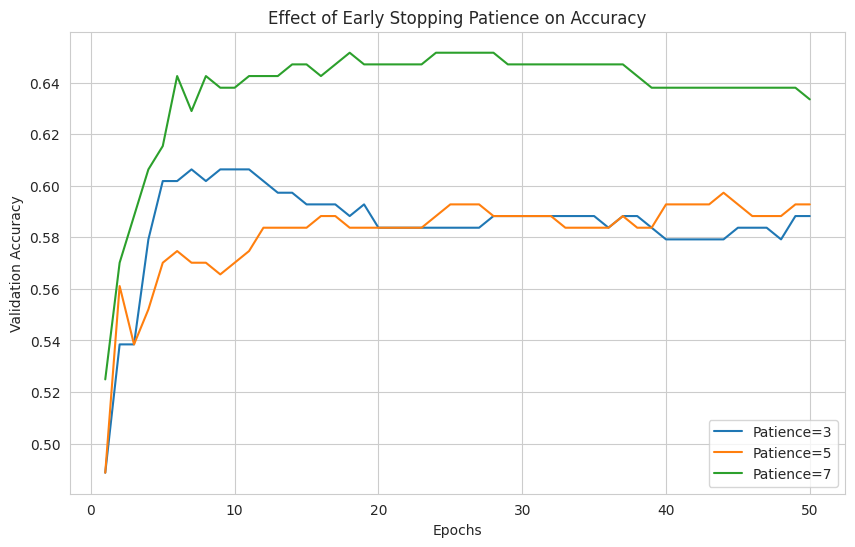

In [25]:
from itertools import product

# Define different patience values to test early stopping effects
patience_values = [3, 5, 7]

# Dictionary to store validation accuracy results for each patience value
results = {}

for patience in patience_values:
    print(f"Training with early stopping patience = {patience}")

    # Initialize a new model for each patience value
    model = ClassifierNN(input_size, hidden_size1=128, hidden_size2=64, num_classes=num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Adam optimizer with weight decay

    train_losses, val_accuracies = [], []
    best_val_loss = np.inf  # Track the best validation loss
    early_stop_counter = 0  # Counter for early stopping

    for epoch in range(epochs):
        model.train()
        train_loss = 0  # Track training loss for the epoch

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()  # Accumulate loss

        train_losses.append(train_loss / len(train_loader))  # Store average loss for the epoch

        # Validation phase
        model.eval()
        y_pred, y_true = [], []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)  # Get class predictions
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())

        val_accuracy = accuracy_score(y_true, y_pred)
        val_accuracies.append(val_accuracy)

        # Check for early stopping condition
        if train_losses[-1] < best_val_loss:
            best_val_loss = train_losses[-1]  # Update best validation loss
            early_stop_counter = 0  # Reset counter
        else:
            early_stop_counter += 1  # Increment counter
            if early_stop_counter >= patience:  # Stop if patience limit is reached
                print(f"Early stopping triggered at epoch {epoch+1}")
                break

    results[patience] = val_accuracies  # Store validation accuracy for this patience value

# Plot validation accuracy trends for different patience values
plt.figure(figsize=(10, 6))
for patience, accuracies in results.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=f"Patience={patience}")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Effect of Early Stopping Patience on Accuracy")
plt.legend()
plt.show()
